## Линейная регрессия

В этом практическом задании четыре обязательных и одна дополнительная задача. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
*Дополнительная задача* для тех, кто хочет потренироваться в подготовке данных для обучения модели и использовании алгоритма линейной регрессии. 
<br>
Удачи!

Цели практического задания: 

1.   Научиться пользоваться моделью линейной регрессии.
2.   Потренироваться в использовании метрики MAE.
3.   Научиться использовать категориальные фичи для задачи линейной регрессии.




В этом практическом задании вы будете работать с данными, которые мы разбирали в видео. В них указаны расходы, выставленные медицинскими страховыми компаниями по клиентам.

Этот датасет мы будем использовать для предсказания расходов по страховке, исходя из характеристик клиента.

**Описание данных:**

*age*: возраст;

*sex*: пол женский/мужской;

*bmi*: индекс массы тела;

*children*: количество детей/иждивенцев, входящих в страховку;

*smoker*: курящий/некурящий;

*region*: район проживания в США, северо-восток, юго-восток, юго-запад, северо-запад;

*charges*: расходы по страховке.

## Обязательные задачи

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import mannwhitneyu
from  scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# cразу скопирую датасет
df_copy = df.copy()


**Задача 0. Подготовка данных для обучения**

Проделайте следующие шаги на этом датафрейме:

1. Создайте датафрейм, положите в него данные по клиентам-женщинам, у которых нет детей, и сумма страховки менее 15 тысяч долларов.
2. Постройте график зависимости стоимости страховки от возраста. Проверьте, что у вас получился следующий график.

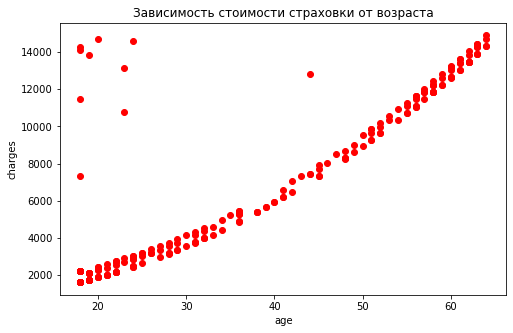

In [6]:
# Ваш код здесь
df_new = df[(df.sex == 'female') & (df.children == 0) & (df.charges < 15000)]
plt.figure(figsize=(8,5))
plt.scatter(df_new.age, df_new.charges, color = 'red')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Зависимость стоимости страховки от возраста');

**Задача 1. Удаление выбросов и обучение модели линейной регрессии**

Проделайте следующие шаги:

3. Удалите  значения charges в выбросах, их на картинке 10 штук. Заново отрисуйте график и убедитесь, что выбросы действительно удалены.
4. Поделите данные на треин и тест выборку в отношении 80/20.
5. Обучите модель линейной регрессии с дефолтными параметрами на одной входной фиче: age; померьте качество на тесте с помощью метрики MAE.

In [7]:
# Ваш код здесь
df1 = (df_new[(df_new.age < 40) & (df_new.charges < 6000)].append(df_new[(df_new.age >= 40) & (df_new.age < 50)
                                                                        & (df_new.charges < 10000)])).append(df_new[(df_new.age >= 50)])

In [54]:
df1

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.740,0,no,southeast,3756.62160
31,18,female,26.315,0,no,northeast,2198.18985
40,24,female,26.600,0,no,northeast,3046.06200
47,28,female,34.770,0,no,northwest,3556.92230
50,18,female,35.625,0,no,northeast,2211.13075
...,...,...,...,...,...,...,...
1187,62,female,32.680,0,no,northwest,13844.79720
1236,63,female,21.660,0,no,northeast,14449.85440
1237,58,female,28.215,0,no,northwest,12224.35085
1259,52,female,23.180,0,no,northeast,10197.77220


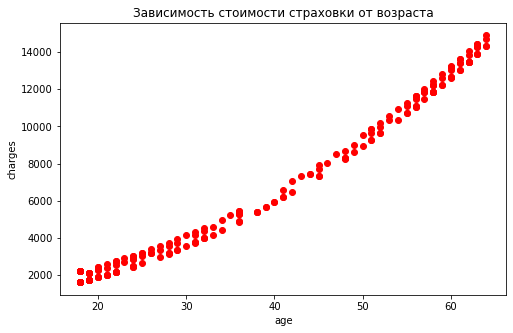

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df1.age, df1.charges, color = 'red')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Зависимость стоимости страховки от возраста');

In [9]:
train, test = train_test_split(df1, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(train[['age']], train.charges)
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

466.10816042599896

**Задача 2. Обучение модели линейной регрессии на нескольких фичах**

Обучите модель линейной регрессии с дефолтными параметрами на данных из предыдущего задания на всех непрерывных фичах, которые есть в датасете. Заранее удалите фичи, в которых присутствует только одно единственное значение.

Рассчитайте новое значение метрики на тестовой выборке. Улучшилась ли метрика по сравнению с предыдущим заданием?

In [25]:
# Ваш код здесь
df2 = df1[['age', 'bmi', 'charges']]
train, test = train_test_split(df2, test_size=0.2, random_state=42)
lr.fit(train.drop(['charges'], axis = 1), train.charges)
pred = lr.predict(test.drop(['charges'], axis = 1))
mean_absolute_error(test.charges, pred)


465.95560716102585

**Задача 3. Обучение модели линейной регрессии с категориальными фичами**

Обучите модель линейной регрессии с дефолтными параметрами на всех фичах, которые есть в датасете. Заранее удалите фичи, в которых присутствует только одно единственное значение. Категориальные фичи преобразуйте с помощью OneHotEncoder.

Рассчитайте новое значение метрики на тестовой выборке. Улучшилась ли метрика по сравнению с предыдущим заданием?

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
# Ваш код здесь
df3 = df
ohe = OneHotEncoder(sparse = False)
ohe.fit(df3[['sex']])
ohe_sex = ohe.transform(df3[['sex']])
df3[ohe.get_feature_names()] = ohe_sex
df3.drop(['sex'], axis = 1)
df4 = df3[['x0_female', 'x0_male', 'age', 'bmi', 'charges']]
df4

,x0_female,x0_male,age,bmi,charges
0,1.0,0.0,19,27.900,16884.92400
1,0.0,1.0,18,33.770,1725.55230
2,0.0,1.0,28,33.000,4449.46200
3,0.0,1.0,33,22.705,21984.47061
4,0.0,1.0,32,28.880,3866.85520
...,...,...,...,...,...
1333,0.0,1.0,50,30.970,10600.54830
1334,1.0,0.0,18,31.920,2205.98080
1335,1.0,0.0,18,36.850,1629.83350
1336,1.0,0.0,21,25.800,2007.94500


In [42]:
train, test = train_test_split(df4, test_size=0.2, random_state=42)
lr.fit(train.drop(['charges'], axis = 1), train.charges)
pred = lr.predict(test.drop(['charges'], axis = 1))
mean_absolute_error(test.charges, pred)

9147.865122298897

In [57]:
df1.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,218.000000,218,218.000000,218.0,218,218,218.000000
unique,NaN,1,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,northeast,NaN
freq,NaN,218,NaN,NaN,218,58,NaN
mean,38.775229,NaN,30.310986,0.0,NaN,NaN,6739.594019
std,16.416243,NaN,5.958165,0.0,NaN,NaN,4455.839013
min,18.000000,NaN,17.290000,0.0,NaN,NaN,1607.510100
25%,22.000000,NaN,26.053750,0.0,NaN,NaN,2475.245350
50%,36.000000,NaN,29.925000,0.0,NaN,NaN,5269.996975
75%,56.000000,NaN,34.727500,0.0,NaN,NaN,11412.150800


In [64]:
df5 = df1.drop(['sex', 'smoker','children'], axis = 1)
ohe.fit(df5[['region']])
ohe_region = ohe.transform(df5[['region']])
df5[ohe.get_feature_names()] = ohe_region
df5 = df5.drop(['region'], axis = 1)
df5.head()

,age,bmi,charges,x0_northeast,x0_northwest,x0_southeast,x0_southwest
5,31,25.740,3756.62160,0.0,0.0,1.0,0.0
31,18,26.315,2198.18985,1.0,0.0,0.0,0.0
40,24,26.600,3046.06200,1.0,0.0,0.0,0.0
47,28,34.770,3556.92230,0.0,1.0,0.0,0.0
50,18,35.625,2211.13075,1.0,0.0,0.0,0.0


In [65]:
train, test = train_test_split(df5, test_size=0.2, random_state=42)
lr.fit(train.drop(['charges'], axis = 1), train.charges)
pred = lr.predict(test.drop(['charges'], axis = 1))
mean_absolute_error(test.charges, pred)

513.7858023806693

In [128]:
df.corr()

,age,bmi,children,charges,x0_female,x0_male
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292
x0_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000
x0_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000


## Дополнительные задачи

Попробуйте обучить модель линейной регрессии на всех данных, которые лежат в `insurance.csv`. Чтобы улучшить показание метрики, попробуйте проделать следующие действия:
- проанализируйте данные на выбросы, подумайте над стратегией как с ними работать так, чтобы модель не ухудшала из-за них свою предсказательную способность;
- используйте только значимые фичи, то есть те, которые влияют на целевую переменную (в этом случае может помочь матрица корреляций и построение графиков зависимости категориальных фичей от целевой переменной);
- используйте scaler для преобразования входных данных;
- попробуйте сгенерировать новые фичи (например из `age` сделать различные категории: молодой, старый).


## Исследуем связь выплат по страховке с полом

### По таблице наблюдается небольшое различие

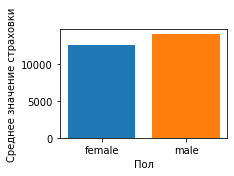

In [129]:
sex = list(df.sex.unique())
fix, ax = plt.subplots(figsize = (3,2))
for i in sex:
    data = df[df['sex'] == i]
    ax.bar(data['sex'],data.charges.mean())
plt.xlabel('Пол')
plt.ylabel('Среднее значение страховки');

### Теперь проведем тест, но сначала изучим распределения на нормальность

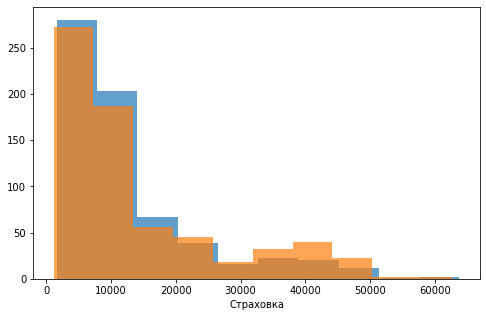

In [147]:
# Посмотрим на распределение Выплат 
sex = list(df.sex.unique())
fix, ax = plt.subplots(figsize = (8,5))
for i in sex:
    data = df[df['sex'] == i]
    ax.hist(data.charges, alpha = 0.7)
plt.xlabel('Страховка');

In [148]:
#Невооруженным взглядом видно, что это скорее распределения Пуассона и между собой сильных различий не имеют
# Но проведем тест Манна-Уитни, чтобы убедиться в этом

from scipy import stats

In [150]:
stats.mannwhitneyu(df[df['sex'] == 'female']['charges'], df[df['sex'] == 'male']['charges'])

MannwhitneyuResult(statistic=221304.0, pvalue=0.7286510894470093)

Что и требовалось доказать, различия не значимы, тогда ПОЛ исключаем из возможных предикторов

### Исследуем связь выплат и колличества детей

На первый взгляд разница между медианными значениями есть, будем смотреть дальше

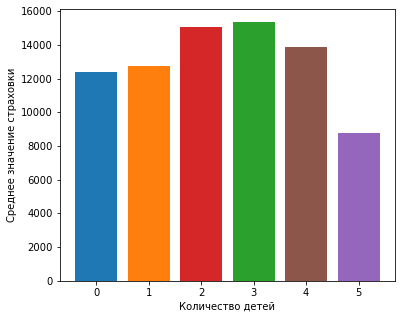

In [152]:
children = list(df.children.unique())
fix, ax = plt.subplots(figsize = (6,5))
for i in children:
    data = df[df['children'] == i]
    ax.bar(data['children'],data.charges.mean())
plt.xlabel('Количество детей')
plt.ylabel('Среднее значение страховки');


Посмотрим распределения выплат


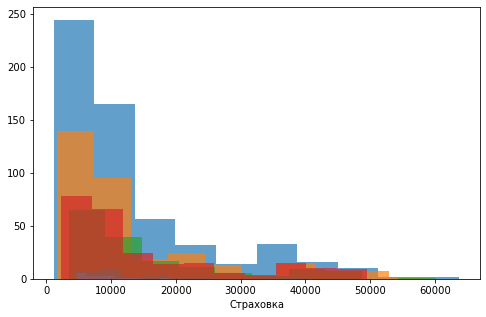

In [153]:
children = list(df.children.unique())
fix, ax = plt.subplots(figsize = (8,5))
for i in children:
    data = df[df['children'] == i]
    ax.hist(data.charges, alpha = 0.7)
plt.xlabel('Страховка');

Для того, чтобы окончательно убедиться проведем тест по критерию Краскела-Уоллеса
Так как это ненормальное распределение.

In [154]:
from scipy.stats import kruskal

In [173]:
# Обратим внимание, что между 0 и 1 ребенком разницы нет
kruskal(df[df['children'] == 0].charges, df[df['children'] == 1].charges)

KruskalResult(statistic=1.9362817222046926, pvalue=0.164072828262026)

In [176]:
#Как и нет разницы между 2, 3, 4 детьми
kruskal(df[df['children'] == 2].charges, df[df['children'] == 3].charges,df[df['children'] == 4].charges)

KruskalResult(statistic=1.427077133698731, pvalue=0.4899075560251599)

In [178]:
# Однако разница между всеми все  же присутствует, отметим, что это значимый предиктор, но не будем дальше исследовать,
# где именно эти различия, это не имеет большой роли, просто включим этот предиктор в модель
kruskal(df[df['children'] == 0].charges, df[df['children'] == 2].charges, 
        df[df['children'] == 3].charges, df[df['children'] == 4].charges,df[df['children'] == 5].charges)

KruskalResult(statistic=26.52576772262038, pvalue=2.478620691103134e-05)

### Проверим связь выплат с регионом проживания

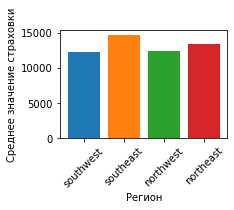

In [179]:
region = list(df.region.unique())
fix, ax = plt.subplots(figsize = (3,2))
for i in region:
    data = df[df['region'] == i]
    ax.bar(data['region'],data.charges.mean())
    plt.xticks(rotation = 45)
plt.xlabel('Регион')
plt.ylabel('Среднее значение страховки');


Ситуация такая же, как с детьми, поэтому воспроизведем те же ступени исследования

In [181]:
kruskal(df[df['region'] == 'southwest'].charges, df[df['region'] == 'southeast'].charges, df[df['region'] == 'northeast'].charges, 
        df[df['region'] == 'northwest'].charges)

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

По итогам теста значимых различий между распределениями выплат разных регионов нет, не включаем этот предиктор в модель

In [182]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

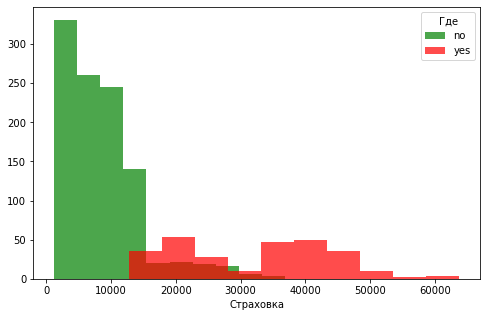

In [184]:
smoker = {'no': 'green', 'yes': 'red'}
fix, ax = plt.subplots(figsize = (8,5))
for i in smoker:
    data = df[df['smoker'] == i]
    ax.hist(data.charges, color = smoker[i], alpha = 0.7)
plt.xlabel('Страховка');
plt.legend(smoker, title = 'Где');

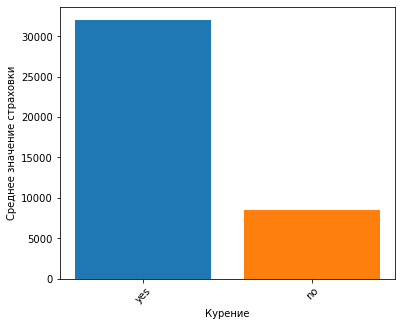

In [188]:
smoker = list(df.smoker.unique())
fix, ax = plt.subplots(figsize = (6,5))
for i in smoker:
    data = df[df['smoker'] == i]
    ax.bar(data['smoker'],data.charges.mean())
    plt.xticks(rotation = 45)
plt.xlabel('Курение')
plt.ylabel('Среднее значение страховки');

На графике распределения заметно очевидная разница, проведем тест Манна-Уитни

In [186]:
# Получили статистически значимые различия
stats.mannwhitneyu(df[df['smoker'] == 'no'].charges, df[df['smoker'] == 'yes'].charges)

MannwhitneyuResult(statistic=7403.0, pvalue=5.270233444503571e-130)

Различия между распределениями выплат курящих и нет значимы. Предиктор Smoker будет включен в модель

### Теперь проверим матрицу корреляций

In [192]:
df.corr()

,age,bmi,children,charges,x0_female,x0_male
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292
x0_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000
x0_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000


Мы уже увидели, что зависимость от возраста есть, но в совокупности с другими факторами.

Теперь проверим как выглядит распределение выплат по ИМТ

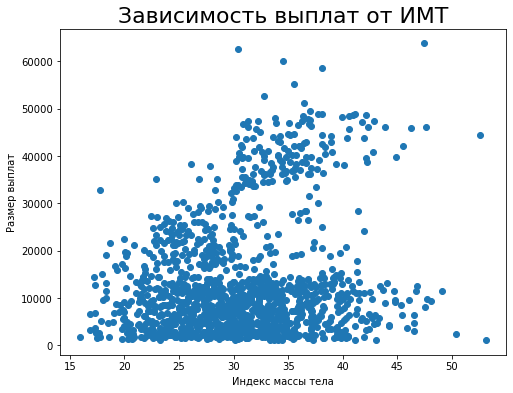

In [202]:
plt.figure(figsize=(8,6))
plt.scatter(df.bmi, df.charges)
plt.xlabel('Индекс массы тела')
plt.ylabel('Размер выплат')
plt.title('Зависимость выплат от ИМТ', size = 22);

Некоторая корреляция будто бы прослеживается, но на первом этапе исключим этот предиктор, а на втором проверим модель с ним

### Таким образом мы получили, что для модели значимыми предикторами будут Smoker, Age, Children.

### На следующем шаге нормализуем количественные переменные Age и Charges и преобразуем с помощью ohe категориальные переменные smoker и children

In [203]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
879,37,female,29.5,2,no,southwest,6311.952


In [250]:
df_reg = df.copy()
df_bmi = df.copy()

In [ ]:
# Удалим лишние атрибуты
df = df.drop(columns=['sex', 'bmi', 'region'], axis = 1)

In [211]:
df.head()

,age,children,smoker,charges
0,19,0,yes,16884.92400
1,18,1,no,1725.55230
2,28,3,no,4449.46200
3,33,0,no,21984.47061
4,32,0,no,3866.85520


In [215]:
scaler = MinMaxScaler()
data = df[['age', 'charges']]
scaler.fit(data)
scaled = scaler.transform(data)
df[['age_scaled', 'charges_scaled']] = scaled
df.head()

,age,children,smoker,charges,age_scaled,charges_scaled
0,19,0,yes,16884.92400,0.021739,0.251611
1,18,1,no,1725.55230,0.000000,0.009636
2,28,3,no,4449.46200,0.217391,0.053115
3,33,0,no,21984.47061,0.326087,0.333010
4,32,0,no,3866.85520,0.304348,0.043816


In [218]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['children']])
ohe_children = ohe.transform(df[['children']])
df[ohe.get_feature_names()] = ohe_children
df.head()

,age,children,smoker,charges,age_scaled,charges_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5
0,19,0,yes,16884.92400,0.021739,0.251611,1.0,0.0,0.0,0.0,0.0,0.0
1,18,1,no,1725.55230,0.000000,0.009636,0.0,1.0,0.0,0.0,0.0,0.0
2,28,3,no,4449.46200,0.217391,0.053115,0.0,0.0,0.0,1.0,0.0,0.0
3,33,0,no,21984.47061,0.326087,0.333010,1.0,0.0,0.0,0.0,0.0,0.0
4,32,0,no,3866.85520,0.304348,0.043816,1.0,0.0,0.0,0.0,0.0,0.0


In [219]:
ohe.fit(df[['smoker']])
ohe_smoker = ohe.transform(df[['smoker']])
df[ohe.get_feature_names()] = ohe_smoker
df.head()

,age,children,smoker,charges,age_scaled,charges_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_no,x0_yes
0,19,0,yes,16884.92400,0.021739,0.251611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18,1,no,1725.55230,0.000000,0.009636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,3,no,4449.46200,0.217391,0.053115,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33,0,no,21984.47061,0.326087,0.333010,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0,no,3866.85520,0.304348,0.043816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
# Удалим ненужные столбцы
df = df.drop(columns=['age', 'children', 'smoker', 'charges'], axis = 1)

In [222]:
df.head()

,age_scaled,charges_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_no,x0_yes
0,0.021739,0.251611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.009636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.053115,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.333010,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.304348,0.043816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Теперь построим линейную регрессию из всех предикторов

In [223]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
lr.fit(train.drop(['charges_scaled'], axis = 1), train.charges_scaled)
pred = lr.predict(test.drop(['charges_scaled'], axis = 1))
mean_absolute_error(test.charges_scaled, pred)

0.06261350094587466

### Попробуем добавить регион в предикторы


In [226]:
df_reg = df_reg.drop(columns=['sex', 'bmi'], axis = 1)

In [228]:
df_reg.head()

,age,children,smoker,region,charges
0,19,0,yes,southwest,16884.92400
1,18,1,no,southeast,1725.55230
2,28,3,no,southeast,4449.46200
3,33,0,no,northwest,21984.47061
4,32,0,no,northwest,3866.85520


### Проделаем все те же шаги, только еще для region

In [229]:
scaler = MinMaxScaler()
data = df_reg[['age', 'charges']]
scaler.fit(data)
scaled = scaler.transform(data)
df_reg[['age_scaled', 'charges_scaled']] = scaled
df_reg.head()

,age,children,smoker,region,charges,age_scaled,charges_scaled
0,19,0,yes,southwest,16884.92400,0.021739,0.251611
1,18,1,no,southeast,1725.55230,0.000000,0.009636
2,28,3,no,southeast,4449.46200,0.217391,0.053115
3,33,0,no,northwest,21984.47061,0.326087,0.333010
4,32,0,no,northwest,3866.85520,0.304348,0.043816


In [230]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_reg[['children']])
ohe_children = ohe.transform(df_reg[['children']])
df_reg[ohe.get_feature_names()] = ohe_children
df_reg.head()

,age,children,smoker,region,charges,age_scaled,charges_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5
0,19,0,yes,southwest,16884.92400,0.021739,0.251611,1.0,0.0,0.0,0.0,0.0,0.0
1,18,1,no,southeast,1725.55230,0.000000,0.009636,0.0,1.0,0.0,0.0,0.0,0.0
2,28,3,no,southeast,4449.46200,0.217391,0.053115,0.0,0.0,0.0,1.0,0.0,0.0
3,33,0,no,northwest,21984.47061,0.326087,0.333010,1.0,0.0,0.0,0.0,0.0,0.0
4,32,0,no,northwest,3866.85520,0.304348,0.043816,1.0,0.0,0.0,0.0,0.0,0.0


In [231]:
ohe.fit(df_reg[['smoker']])
ohe_smoker = ohe.transform(df_reg[['smoker']])
df_reg[ohe.get_feature_names()] = ohe_smoker
df_reg.head()

,age,children,smoker,region,charges,age_scaled,charges_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_no,x0_yes
0,19,0,yes,southwest,16884.92400,0.021739,0.251611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18,1,no,southeast,1725.55230,0.000000,0.009636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,3,no,southeast,4449.46200,0.217391,0.053115,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33,0,no,northwest,21984.47061,0.326087,0.333010,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0,no,northwest,3866.85520,0.304348,0.043816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [232]:
ohe.fit(df_reg[['region']])
ohe_region = ohe.transform(df_reg[['region']])
df_reg[ohe.get_feature_names()] = ohe_region
df_reg.head()

,age,children,smoker,region,charges,age_scaled,charges_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_no,x0_yes,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,19,0,yes,southwest,16884.92400,0.021739,0.251611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,1,no,southeast,1725.55230,0.000000,0.009636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,3,no,southeast,4449.46200,0.217391,0.053115,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,0,no,northwest,21984.47061,0.326087,0.333010,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,0,no,northwest,3866.85520,0.304348,0.043816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [233]:
df_reg = df_reg.drop(columns=['age', 'children', 'smoker', 'charges', 'region'], axis = 1)

In [234]:
df_reg.head()

,age_scaled,charges_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_no,x0_yes,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,0.021739,0.251611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.009636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.053115,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.333010,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.043816,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Теперь построим линейную регрессию, доббавив в предикторы Регион

In [235]:
train, test = train_test_split(df_reg, test_size=0.2, random_state=42)
lr.fit(train.drop(['charges_scaled'], axis = 1), train.charges_scaled)
pred = lr.predict(test.drop(['charges_scaled'], axis = 1))
mean_absolute_error(test.charges_scaled, pred)

0.06288673644322543

### Добавив незначимый предиктор стало хуже, попробуем добавить bmi

In [251]:
df_bmi = df_bmi.drop(columns=['sex', 'region'], axis = 1)

In [252]:
scaler = MinMaxScaler()
data = df_bmi[['age', 'charges', 'bmi']]
scaler.fit(data)
scaled = scaler.transform(data)
df_bmi[['age_scaled', 'charges_scaled', 'bmi_scaled']] = scaled
df_bmi.head()

,age,bmi,children,smoker,charges,age_scaled,charges_scaled,bmi_scaled
0,19,27.900,0,yes,16884.92400,0.021739,0.251611,0.321227
1,18,33.770,1,no,1725.55230,0.000000,0.009636,0.479150
2,28,33.000,3,no,4449.46200,0.217391,0.053115,0.458434
3,33,22.705,0,no,21984.47061,0.326087,0.333010,0.181464
4,32,28.880,0,no,3866.85520,0.304348,0.043816,0.347592


In [253]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_bmi[['children']])
ohe_children = ohe.transform(df_bmi[['children']])
df_bmi[ohe.get_feature_names()] = ohe_children
df_bmi.head()

,age,bmi,children,smoker,charges,age_scaled,charges_scaled,bmi_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5
0,19,27.900,0,yes,16884.92400,0.021739,0.251611,0.321227,1.0,0.0,0.0,0.0,0.0,0.0
1,18,33.770,1,no,1725.55230,0.000000,0.009636,0.479150,0.0,1.0,0.0,0.0,0.0,0.0
2,28,33.000,3,no,4449.46200,0.217391,0.053115,0.458434,0.0,0.0,0.0,1.0,0.0,0.0
3,33,22.705,0,no,21984.47061,0.326087,0.333010,0.181464,1.0,0.0,0.0,0.0,0.0,0.0
4,32,28.880,0,no,3866.85520,0.304348,0.043816,0.347592,1.0,0.0,0.0,0.0,0.0,0.0


In [254]:
ohe.fit(df_bmi[['smoker']])
ohe_smoker = ohe.transform(df_bmi[['smoker']])
df_bmi[ohe.get_feature_names()] = ohe_smoker
df_bmi.head()

,age,bmi,children,smoker,charges,age_scaled,charges_scaled,bmi_scaled,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_no,x0_yes
0,19,27.900,0,yes,16884.92400,0.021739,0.251611,0.321227,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,no,1725.55230,0.000000,0.009636,0.479150,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,no,4449.46200,0.217391,0.053115,0.458434,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,no,21984.47061,0.326087,0.333010,0.181464,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,28.880,0,no,3866.85520,0.304348,0.043816,0.347592,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [255]:
df_bmi = df_bmi.drop(columns=['age', 'children', 'smoker', 'charges', 'bmi'], axis = 1)

### Теперь построим линейную регрессию, доббавив в предикторы ИМТ

In [256]:
train, test = train_test_split(df_bmi, test_size=0.2, random_state=42)
lr.fit(train.drop(['charges_scaled'], axis = 1), train.charges_scaled)
pred = lr.predict(test.drop(['charges_scaled'], axis = 1))
mean_absolute_error(test.charges_scaled, pred)

0.06880275875080986

### Очевидно, что МАЕ опять стала хуже, оставляем модель из трех предикторов: smoker, age, children с МАЕ около 0.062

## Теперь построим логистическую регрессию для предсказания целевой переменной smoker

In [9]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Проверим зависимость переменной smoker от возраста

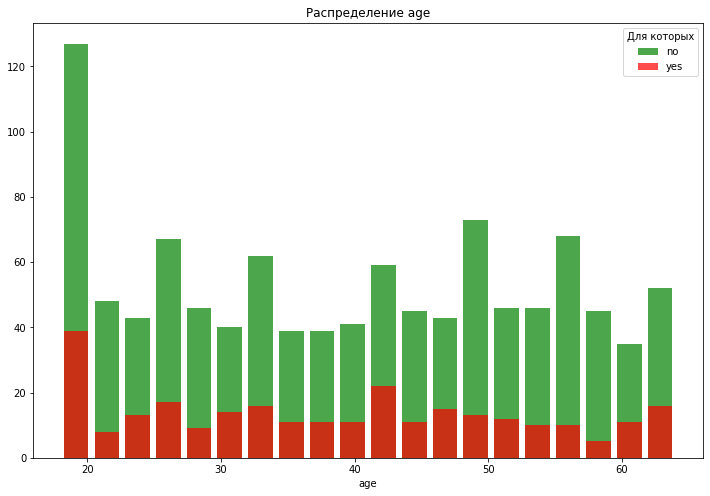

In [15]:
#график для наглядности
colors = {'no': 'green', 'yes': 'red'}
fix, ax = plt.subplots(figsize = (12, 8))
for smoker in colors:
    color = colors[smoker]
    data = df[df['smoker'] == smoker]
    ax.hist(data['age'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7, histtype='bar')
plt.legend(colors, title = 'Для которых')
plt.xlabel('age')
plt.title('Распределение age')
plt.show();


Так как выборки распределены не нормально, не зависимы, то применим критерий U-критерий Манна-Уитни

In [33]:
mannwhitneyu(df_copy[df_copy['smoker'] == 'yes']['age'], df_copy[df_copy['smoker'] == 'no']['age'])

MannwhitneyuResult(statistic=140512.0, pvalue=0.35666780172672297)

Значимых различий нет

## Теперь проверим зависимость переменной smoker от переменной sex
### Для этого воспользуемся хи квадратом Пирсона

In [49]:
# Определим значения квадрата 
df_copy.groupby(['smoker', 'sex']).agg({'region': 'count'})

region
smoker sex           
no     female     547
       male       517
yes    female     115
       male       159

In [51]:
kf_data = np.array([[547,115], [517,159]])
kf = chi2_contingency(kf_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=7.3929, p-value=0.0065, df=1 expected_frep=[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


Можно сделать вывод что пол значимый предиктор

### Проверим зависимость переменной smoker от bmi

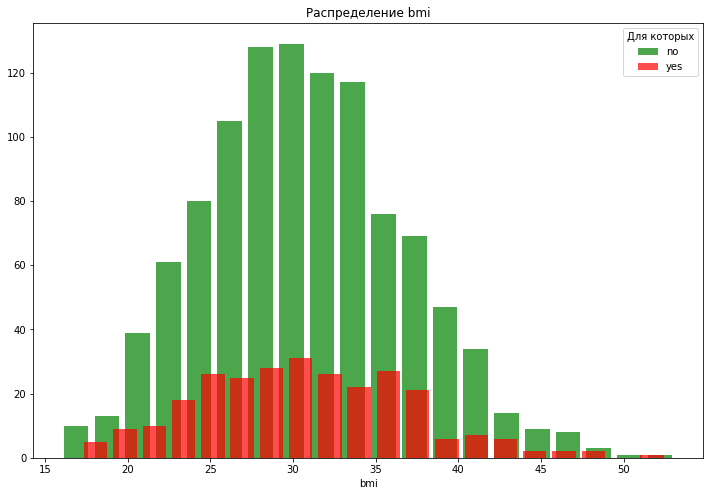

In [52]:
#график для наглядности
colors = {'no': 'green', 'yes': 'red'}
fix, ax = plt.subplots(figsize = (12, 8))
for smoker in colors:
    color = colors[smoker]
    data = df[df['smoker'] == smoker]
    ax.hist(data['bmi'], bins = 20, rwidth = 0.8, color = color, alpha = 0.7, histtype='bar')
plt.legend(colors, title = 'Для которых')
plt.xlabel('bmi')
plt.title('Распределение bmi')
plt.show();

In [53]:
# На взгляд распределения нормальные

In [55]:
from scipy import stats

In [57]:
# проверим равенство дисперсий
stats.levene(df_copy[df_copy['smoker'] == 'yes']['bmi'], df_copy[df_copy['smoker'] == 'no']['bmi'])

LeveneResult(statistic=1.1973276564141475, pvalue=0.27405368768509536)

In [58]:
# проверим нормальность
stats.shapiro(df_copy[df_copy['smoker'] == 'yes']['bmi'])

ShapiroResult(statistic=0.9908562302589417, pvalue=0.08519139140844345)

In [61]:
# Распределение bmi у некурящих значимо отличается от нормального
stats.shapiro(df_copy[df_copy['smoker'] == 'no']['bmi'])

ShapiroResult(statistic=0.9942501187324524, pvalue=0.0004210668848827481)

In [62]:
stats.mannwhitneyu(df_copy[df_copy['smoker'] == 'yes']['bmi'], df_copy[df_copy['smoker'] == 'no']['bmi'])

MannwhitneyuResult(statistic=146227.5, pvalue=0.9358582951042107)

Значимых различий нет

## Проверим зависимость переменной smoker от charges

In [63]:
stats.mannwhitneyu(df_copy[df_copy['smoker'] == 'yes']['charges'], df_copy[df_copy['smoker'] == 'no']['charges'])

MannwhitneyuResult(statistic=284133.0, pvalue=5.270233444503571e-130)

## Есть значимые различия

### Проверим зависимость переменной smoker от region

In [64]:
df_copy.groupby(['smoker', 'region']).agg({'children': 'count'})

children
smoker region             
no     northeast       257
       northwest       267
       southeast       273
       southwest       267
yes    northeast        67
       northwest        58
       southeast        91
       southwest        58

In [65]:
kf_data = np.array([[257,67], [267,58], [273, 91], [267, 58]])
kf = chi2_contingency(kf_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=7.3435, p-value=0.0617, df=3 expected_frep=[[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]]


### Различия на уровне тенденции

### Проверим зависимость переменной smoker от children

In [66]:
df_copy.groupby(['smoker', 'children']).agg({'region': 'count'})

region
smoker children        
no     0            459
       1            263
       2            185
       3            118
       4             22
       5             17
yes    0            115
       1             61
       2             55
       3             39
       4              3
       5              1

In [67]:
kf_data = np.array([[459, 115], [263,61], [185, 55], [118, 39], [22, 3], [17, 1]])
kf = chi2_contingency(kf_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=6.8877, p-value=0.2291, df=5 expected_frep=[[456.45440957 117.54559043]
 [257.65022422  66.34977578]
 [190.85201794  49.14798206]
 [124.8490284   32.1509716 ]
 [ 19.88041854   5.11958146]
 [ 14.31390135   3.68609865]]


Значимых различий нет

In [68]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Таким образом, найдены следующие предикторы для переменной smoker: sex, charges и region

### Построим модель логистической регрессии

In [70]:
df_lr = df_copy.copy()
df_lr = df_lr.drop(columns=['age', 'bmi', 'children'], axis = 1)

In [74]:
df_lr

,sex,smoker,region,charges
0,female,yes,southwest,16884.92400
1,male,no,southeast,1725.55230
2,male,no,southeast,4449.46200
3,male,no,northwest,21984.47061
4,male,no,northwest,3866.85520
...,...,...,...,...
1333,male,no,northwest,10600.54830
1334,female,no,northeast,2205.98080
1335,female,no,southeast,1629.83350
1336,female,no,southwest,2007.94500


### Преобразуем переменную sex

In [76]:
df_lr.sex = df_lr.apply(lambda x: 1 if x.sex == 'male' else 0, axis = 1)

In [77]:
df_lr.head()

,sex,smoker,region,charges
0,0,yes,southwest,16884.92400
1,1,no,southeast,1725.55230
2,1,no,southeast,4449.46200
3,1,no,northwest,21984.47061
4,1,no,northwest,3866.85520


## Преобразуем категориальную переменную region

In [81]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_lr[['region']])
ohe_region = ohe.transform(df_lr[['region']])
df_lr[ohe.get_feature_names()] = ohe_region
df_lr.head()

,sex,smoker,region,charges,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0
1,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0
2,1,no,southeast,4449.46200,0.0,0.0,1.0,0.0
3,1,no,northwest,21984.47061,0.0,1.0,0.0,0.0
4,1,no,northwest,3866.85520,0.0,1.0,0.0,0.0


In [83]:
df_lr = df_lr.drop(['region'], axis = 1)

## Преобразуем переменную smoker

In [85]:
df_lr.smoker = df_lr.apply(lambda x: 1 if x.smoker == 'yes' else 0, axis = 1)

In [86]:
x = df_lr.drop(['sex'], axis = 1)
y = df_lr.sex
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred = logreg.predict(test_x)
accuracy_score(test_y, pred)

0.48756218905472637

In [87]:
pred = logreg.predict(train_x)
accuracy_score(train_y, pred)

0.5128205128205128

In [89]:
# Очень малые значения коэффициентов, поэтому точность модели крайне мала
logreg.coef_

array([[ 4.83838624e-10,  5.12572103e-06,  3.00738717e-10,
         8.75666321e-10, -9.43153062e-10, -4.47504350e-10]])

### Теперь построим модель простой НС

In [101]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
pred_mlp = mlp.predict(test_x)
accuracy_score(test_y, pred_mlp)

0.5124378109452736

Фактически модель просто угадывает ответ